# Clustering

In this assignment, you will implement a K-Means Clustering algorithm from scratch and compare the results to existing sklearn algorithm.

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Question 1.1: Write a method that determine Labels from Points and ClusterCentroids, and return a list of a label for each point

In [35]:
def FindLabelOfClosest(Points, ClusterCentroids): # determine Labels from Points and ClusterCentroids
    NumberOfClusters, NumberOfDimensions = ClusterCentroids.shape # dimensions of the initial Centroids
    Distances = np.array([float('inf')]*NumberOfClusters)
    NumberOfPoints, NumberOfDimensions = Points.shape
    Labels = np.array([-1]*NumberOfPoints)
    for PointNumber in range(NumberOfPoints): # assign labels to all data points
        for ClusterNumber in range(NumberOfClusters): # for each cluster
            # Get distances for each cluster
            Distances[ClusterNumber] = np.linalg.norm(Points.iloc[PointNumber] - ClusterCentroids.iloc[ClusterNumber]) # Euclidean distance
        Labels[PointNumber] = np.argmin(Distances)
    return Labels # return the a label for each point


Question 1.2: Write a method that determine centroid of Points with the same label

In [36]:
def CalculateClusterCentroid(Points, Labels): # determine centroid of Points with the same label
    ClusterLabels = np.unique(Labels) # names of labels
    NumberOfPoints, NumberOfDimensions = Points.shape
    ClusterCentroids = pd.DataFrame(np.array([[float('nan')]*NumberOfDimensions]*len(ClusterLabels)))
    for ClusterNumber in ClusterLabels: # for each cluster
        # get mean for each label
        ClusterCentroids.loc[ClusterNumber, :] = np.mean(Points.loc[ClusterNumber == Labels, :])
    return ClusterCentroids # return the a label for each point

Question 1.3: Put it all together as such. K-means algorithm partitions the input data into K clusters by iterating between the following two steps:
- Compute the cluster center by computing the arithmetic mean of all the points belonging to the cluster.
- Assign each point to the closest cluster center.

In [37]:
def KMeans(Points, ClusterCentroidGuesses):
    ClusterCentroids = ClusterCentroidGuesses.copy()
    Labels_Previous = None
    # Get starting set of labels
    Labels = FindLabelOfClosest(Points, ClusterCentroids)
    while not np.array_equal(Labels, Labels_Previous):
        # Re-calculate cluster centers based on new set of labels
        ClusterCentroids = CalculateClusterCentroid(Points, Labels)
        Labels_Previous = Labels.copy() # Must make a deep copy
        # Determine new labels based on new cluster centers
        Labels = FindLabelOfClosest(Points, ClusterCentroids)
    return Labels, ClusterCentroids

In [38]:
StoreTxn = pd.read_csv("./Superstore Transaction data.csv")
StoreTxn['Order Date'] = pd.to_datetime(StoreTxn['Order Date'] )
StoreTxn.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Extract RFM features from the transaction data:
- Recency: when was the last purchase they made
- Frequency: how often do they make a purchase in the last month (or any given window you choose)
- Monetary: how much money did they spend in the last month

Question 2.1:
- Use groupby to summarize the quantity and dollar columns by user_id and date
- Name the aggregated data txn_agg
- Reset the index for txn_agg to the default and user_id and date to dataframe columns
- Confirm changes

In [39]:
StoreTxn.info()

StoreTxn.nunique()

StoreTxn.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [40]:
txn_agg = StoreTxn.groupby(['Customer ID', 'Order Date']).agg({
    'Quantity': 'sum',
    'Sales': 'sum'
}).reset_index() # #Summarize quantity and dollar by user_id - date.
txn_agg.head(10)

,Customer ID,Order Date,Quantity,Sales
0,AA-10315,2014-03-31,4,726.548
1,AA-10315,2014-09-15,5,29.500
2,AA-10315,2015-10-04,2,26.960
3,AA-10315,2016-03-03,14,4406.072
4,AA-10315,2017-06-29,5,374.480
5,AA-10375,2014-04-21,5,16.520
6,AA-10375,2014-10-24,3,34.272
7,AA-10375,2015-02-03,5,178.370
8,AA-10375,2015-05-08,2,5.248
9,AA-10375,2015-11-13,6,84.960


Question 2.2:Using the aggregated data, obtain recency, frequency and monetary features for both dollar and quantity. Use a 7-day moving window for frequency and monetary. Call your new features last_visit_ndays (recency) quantity_roll_sum_7D (frequency) and dollar_roll_sum_7D (monetary)

In [41]:
txn_agg.sort_values(by=['Customer ID', 'Order Date'], inplace=True)

last_txn = txn_agg.groupby('Customer ID')['Order Date'].diff(periods = 1).dt.days
#last_txn.rename({'Order Date' : 'last_visit_ndays'}, inplace = True) # Name the lagged date values last_visit_ndays
last = pd.concat([txn_agg, last_txn], axis=1)
last.columns = [*last.columns[:-1], 'last_visit_ndays']
print(last.head(10), end='\n\n')

roll_sum_sales = txn_agg.groupby('Customer ID').rolling(window='7D', on='Order Date', min_periods=1)['Sales'].sum()
roll_sum_quantity = txn_agg.groupby('Customer ID').rolling(window='7D', on='Order Date', min_periods=1)['Quantity'].sum()
roll = pd.concat([roll_sum_sales, roll_sum_quantity], axis=1)
roll.rename(columns={'Quantity' : 'Quantity_roll_sum_7D', 'Sales' : 'Sales_roll_sum_7D'}, inplace = True) # Name the resulting data values quantity_roll_sum_7D and dollar_roll_sum_7D
print(roll.head(10), end='\n\n')

  Customer ID Order Date  Quantity     Sales  last_visit_ndays
0    AA-10315 2014-03-31         4   726.548               NaN
1    AA-10315 2014-09-15         5    29.500             168.0
2    AA-10315 2015-10-04         2    26.960             384.0
3    AA-10315 2016-03-03        14  4406.072             151.0
4    AA-10315 2017-06-29         5   374.480             483.0
5    AA-10375 2014-04-21         5    16.520               NaN
6    AA-10375 2014-10-24         3    34.272             186.0
7    AA-10375 2015-02-03         5   178.370             102.0
8    AA-10375 2015-05-08         2     5.248              94.0
9    AA-10375 2015-11-13         6    84.960             189.0

                        Sales_roll_sum_7D  Quantity_roll_sum_7D
Customer ID Order Date                                         
AA-10315    2014-03-31            726.548                   4.0
            2014-09-15             29.500                   5.0
            2015-10-04             26.960         

Question 2.3: Combine all three features into a single DataFrame and call it txn_roll

In [42]:
txn_roll = last.merge(roll, on=['Customer ID', 'Order Date']).reset_index() # Inner join between roll (frequency and monetary fields) and last (recency fields) to create churn_roll.  Join based on index which works given that both dataframes are sorted by user_id and date.
print(txn_roll.dtypes, end='\n\n')
txn_roll.head(10)


index                            int64
Customer ID                     object
Order Date              datetime64[ns]
Quantity                         int64
Sales                          float64
last_visit_ndays               float64
Sales_roll_sum_7D              float64
Quantity_roll_sum_7D           float64
dtype: object



,index,Customer ID,Order Date,Quantity,Sales,last_visit_ndays,Sales_roll_sum_7D,Quantity_roll_sum_7D
0,0,AA-10315,2014-03-31,4,726.548,NaN,726.548,4.0
1,1,AA-10315,2014-09-15,5,29.500,168.0,29.500,5.0
2,2,AA-10315,2015-10-04,2,26.960,384.0,26.960,2.0
3,3,AA-10315,2016-03-03,14,4406.072,151.0,4406.072,14.0
4,4,AA-10315,2017-06-29,5,374.480,483.0,374.480,5.0
5,5,AA-10375,2014-04-21,5,16.520,NaN,16.520,5.0
6,6,AA-10375,2014-10-24,3,34.272,186.0,34.272,3.0
7,7,AA-10375,2015-02-03,5,178.370,102.0,178.370,5.0
8,8,AA-10375,2015-05-08,2,5.248,94.0,5.248,2.0
9,9,AA-10375,2015-11-13,6,84.960,189.0,84.960,6.0


Question 2.4: Use fillna to replace missing values for recency with a large value like 100 days (whatever makes business sense). HINT: You can use pd.Timedelta('100 days') to set the value.

In [43]:
txn_roll['last_visit_ndays'] = txn_roll['last_visit_ndays'].fillna(100) # Timedelta gives strange output
txn_roll.head(10)

,index,Customer ID,Order Date,Quantity,Sales,last_visit_ndays,Sales_roll_sum_7D,Quantity_roll_sum_7D
0,0,AA-10315,2014-03-31,4,726.548,100.0,726.548,4.0
1,1,AA-10315,2014-09-15,5,29.500,168.0,29.500,5.0
2,2,AA-10315,2015-10-04,2,26.960,384.0,26.960,2.0
3,3,AA-10315,2016-03-03,14,4406.072,151.0,4406.072,14.0
4,4,AA-10315,2017-06-29,5,374.480,483.0,374.480,5.0
5,5,AA-10375,2014-04-21,5,16.520,100.0,16.520,5.0
6,6,AA-10375,2014-10-24,3,34.272,186.0,34.272,3.0
7,7,AA-10375,2015-02-03,5,178.370,102.0,178.370,5.0
8,8,AA-10375,2015-05-08,2,5.248,94.0,5.248,2.0
9,9,AA-10375,2015-11-13,6,84.960,189.0,84.960,6.0


Question 2.5: Merge the aggregated data churn_agg with the RFM features in churn_roll. You can use the merge method to do this with the right keys specified.

In [44]:
txn_rfm = txn_agg.merge(txn_roll, on=['Customer ID','Order Date', 'Sales', 'Quantity']).reset_index() #merge on Customer ID and Order Date
txn_rfm.head(10)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
txn_rfm['Customer ID'] = le.fit_transform(txn_rfm['Customer ID'])
#txn_rfm["Order Date"] = pd.to_datetime(txn_rfm['Order Date'])
txn_rfm = txn_rfm.drop(columns=['Order Date','level_0','index'])
txn_rfm.head(10)

#txn_rfm.dtypes
#txn_rfm.shape

,Customer ID,Quantity,Sales,last_visit_ndays,Sales_roll_sum_7D,Quantity_roll_sum_7D
0,0,4,726.548,100.0,726.548,4.0
1,0,5,29.500,168.0,29.500,5.0
2,0,2,26.960,384.0,26.960,2.0
3,0,14,4406.072,151.0,4406.072,14.0
4,0,5,374.480,483.0,374.480,5.0
5,1,5,16.520,100.0,16.520,5.0
6,1,3,34.272,186.0,34.272,3.0
7,1,5,178.370,102.0,178.370,5.0
8,1,2,5.248,94.0,5.248,2.0
9,1,6,84.960,189.0,84.960,6.0


Question 3.1: Train the k-means algorithm you developed earlier on the RFM features using  𝑘=4 . What are the cluster centroids? The cluster centroids should be reported in the original scale, not the standardized scale.

In [45]:
# Create random data? Not really sure how to do this...

num_clusters = 4
num_features = 6 # of features

ClusterCentroidGuesses = pd.DataFrame(np.random.rand(num_clusters, num_features), columns=['Customer ID',	'Quantity',	'Sales',	'last_visit_ndays',	'Sales_roll_sum_7D','Quantity_roll_sum_7D'])

ClusterCentroidGuesses.head(10)

Labels, ClusterCentroids = KMeans(txn_rfm, ClusterCentroidGuesses)

Question 3.2: Pick few pairs and plot scatter plots along with cluster centroids.

Text(0.5, 1.0, 'KMeans Clusters')

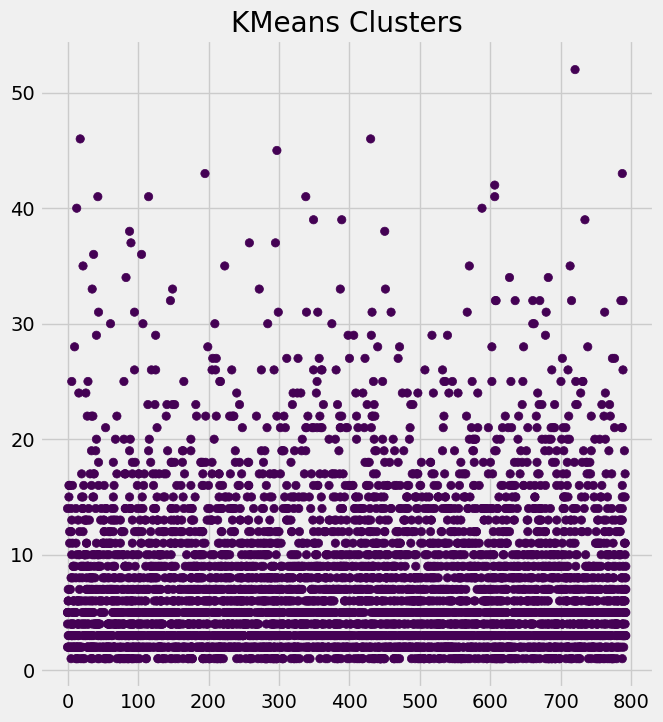

In [46]:
plt.figure(figsize=(24, 8))
plt.subplot(131)
plt.scatter(txn_rfm.iloc[:, 0], txn_rfm.iloc[:, 1], c=Labels)
plt.title("KMeans Clusters")


# Analysis

I clearly did something wrong. Not sure what but this almost looks like a frequency map.

[Bonus] Question 4: Train k-means model using sklearn library and compare results to the model developed above.

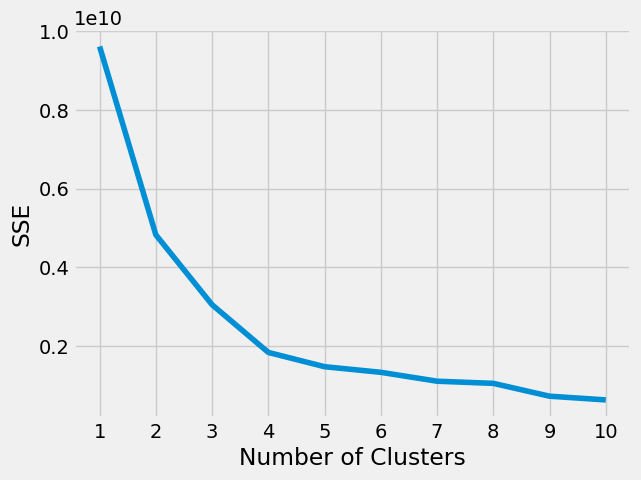

In [47]:
from sklearn.cluster import KMeans as KM
from sklearn.preprocessing import StandardScaler

kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 1000,
   "random_state": 42,
}

def kmeans_elbow(X, kmeans_kwargs):
  sse = []
  for k in range(1, 11):
      kmeans = KM(n_clusters=k, **kmeans_kwargs)
      kmeans.fit(X)
      sse.append(kmeans.inertia_)

  plt.style.use("fivethirtyeight")
  plt.plot(range(1, 11), sse)
  plt.xticks(range(1, 11))
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE")
  plt.show()

kmeans_elbow(txn_rfm, kmeans_kwargs)

# 4 seems optimal

In [48]:
txn = txn_rfm.copy()
txn_scaled = StandardScaler().fit_transform(txn)
txn = txn_scaled.transpose()

Cluster = KM(init="random", n_clusters=4, random_state=42)
Cluster.fit(txn)
y_pred = Cluster.predict(txn)

print(y_pred)

[2 1 0 3 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'KMeans Clusters')

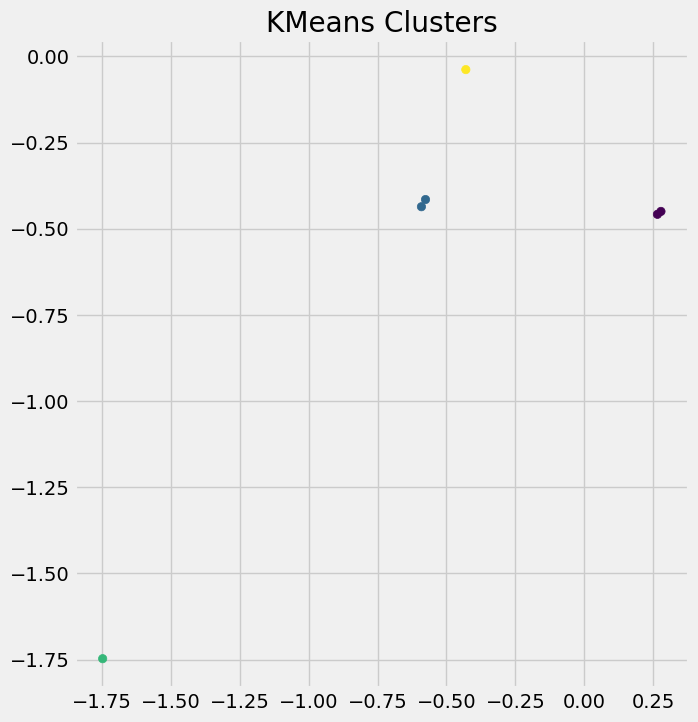

In [49]:
plt.figure(figsize=(24, 8))
plt.subplot(131)
plt.scatter(txn[:, 0], txn[:, 1], c=Cluster.labels_)
plt.title("KMeans Clusters")

Question 5: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

Q.5

1. Experience was mostly limited to the labs, but I see a lot of use for clustering.
2. I encountered a lot of obstacles this week, wrangling the display APIs and ended up just copying what we did for the Class Exercise, which didn't give me the prettiest or most interesting results. Also got confused on the churn/roll/aggregate naming but figured it out. I had plenty of issues with the algorithm as well, and feeding in the appropriate random data.
3. This is easily applicable to...well, the store scenario. It's also applicable to finding clusters of like-minded users to determine how people may act in given situations.

In [ ]:
%%shell

jupyter nbconvert --to html /content/Lab06.ipynb